# The Battle of Neighborhoods
## --Capstone project

## Introduction of the Business Problem

### "Would you please help me to find the best location in HK to open a new cinema?" from Jack Ma.

As is well known, Hong Kong is famous for its entertainments industry. 

Nowadays, Jack aims to setting up his first cinema in HK to start up his new business in the field of entertainments. Here comes his problem that how to make decision to choose the best location for a cinema. Therefore, I would provide him data and analysis to find a amazing spot for his first cinema in HK.
  
In gerneral, watching movie is part of whole afternoon or night activities. Cinema should have many restaurants and shopping places around it. Transportation is also an important factor. Customer can walk to cinema within few minutess from public transport facilities such as bus stop or subway station.
  
I would focus on the environment of cinema and I have got a list of top 10 favorite cinemas in HK with rating.  

Several potential locations would be pointed out and the best one should be recommended to Jack, the boss.

In the future, more cinemas would be open in HK and other cities, This project could provide advices and support the decision making for the business.

## Data section

#### 1. Geographic Coordinate of HK cinemas

First, I will acquire a list of HK cinema with their geographic coordinates from https://hkmovie6.com/cinema .

In [6]:
# Import library
import json
import pandas as pd

In [7]:
# Download cinema list
!wget -O hk_cinema_list.json https://hkmovie6.com/api/cinemas/lists

--2019-05-20 22:32:02--  https://hkmovie6.com/api/cinemas/lists
正在解析主机 hkmovie6.com (hkmovie6.com)... 2606:4700:30::681f:4301, 2606:4700:30::681f:4201, 104.31.66.1, ...
正在连接 hkmovie6.com (hkmovie6.com)|2606:4700:30::681f:4301|:443... 失败：Operation timed out。
正在连接 hkmovie6.com (hkmovie6.com)|2606:4700:30::681f:4201|:443... 失败：Operation timed out。
正在连接 hkmovie6.com (hkmovie6.com)|104.31.66.1|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：未指定 [application/json]
正在保存至: “hk_cinema_list.json”

hk_cinema_list.json     [   <=>              ]  52.07K  18.6KB/s  用时 2.8s    

2019-05-20 22:34:41 (18.6 KB/s) - “hk_cinema_list.json” 已保存 [53320]



In [8]:
# Convert JSON file to DataFrmae
cinemas_json = None
with open('hk_cinema_list.json', 'r') as f:
    cinemas_json = json.load(f)
    
cinemas = []
for data in cinemas_json['data']:
    cinemas.append({
        'Name': data['name'],
        'Address': data['address'],
        'Latitude': data['lat'],
        'Longitude': data['lon']
    })
df_cinemas = pd.DataFrame(cinemas, columns=['Name','Address','Latitude','Longitude'])

In [9]:
print('There existing {} cinemas in HK for now'.format(len(df_cinemas)))

There existing 70 cinemas in HK for now


In [10]:
df_cinemas.head()

,Name,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,The Coronet @ Emperor Cinemas - Entertainment ...,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
2,Emperor Cinemas - Tuen Mun,"3/F, New Town Commercial Arcade, 2 Tuen Lee St...",22.390776,113.975983
3,Broadway Circuit - CYBERPORT,"Shop L1 - 3, Level 1, The Arcade, 100 Cyberpor...",22.261067,114.129825
4,Cinema City VICTORIA (Causeway Bay),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126


The geographic coordinates of 5 potential cinemas.

In [11]:
p_locations = [
    { 'Location': 'L1', 'Address': 'Sau Mau Ping Shopping Centre, Sau Mau Ping', 'Latitude': 22.319503, 'Longitude' : 114.232187},
    { 'Location': 'L2', 'Address': 'Tuen Mun Ferry, Tuen Mun', 'Latitude': 22.371780, 'Longitude' : 113.966039},
    { 'Location': 'L3', 'Address': 'Un Chau Shopping Centre, Cheung Sha Wan', 'Latitude': 22.337280, 'Longitude' : 114.156457},
    { 'Location': 'L4', 'Address': 'Prosperity Millennia Plaza, North Point', 'Latitude': 22.291698, 'Longitude' : 114.208168},
    { 'Location': 'L5', 'Address': 'Tsuen Fung Centre Shopping Arcade, Tsuen Wan', 'Latitude': 22.372112, 'Longitude' : 114.119317},
]

Dataframe of 5 potential locations with geographic coordinates information

In [12]:
df_p_locations = pd.DataFrame(p_locations, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_p_locations

,Location,Address,Latitude,Longitude
0,L1,"Sau Mau Ping Shopping Centre, Sau Mau Ping",22.319503,114.232187
1,L2,"Tuen Mun Ferry, Tuen Mun",22.371780,113.966039
2,L3,"Un Chau Shopping Centre, Cheung Sha Wan",22.337280,114.156457
3,L4,"Prosperity Millennia Plaza, North Point",22.291698,114.208168
4,L5,"Tsuen Fung Centre Shopping Arcade, Tsuen Wan",22.372112,114.119317


#### 2. Favorite cinema list from Jack

The favorite cinema list provide information that I could use to choose the best location and the rating is range of 1.0 (worst) to 5.0 (best) values.

In [13]:
Jack_list = [
    {'Name': 'Boradway Circuit - MONGKONG', 'Rating': 4.5},
    {'Name': 'Boradway Circuit - The ONE', 'Rating': 4.5},
    {'Name': 'Grand Ocean', 'Rating': 4.3},
    {'Name': 'The Grand Cinema', 'Rating': 3.4},
    {'Name': 'AMC Pacific Place', 'Rating': 2.3},
    {'Name': 'UA IMAX @ Airport', 'Rating': 1.5},
]

df_Jack_list = pd.DataFrame(Jack_list, columns=['Name','Rating'])

df_Jack_list

,Name,Rating
0,Boradway Circuit - MONGKONG,4.5
1,Boradway Circuit - The ONE,4.5
2,Grand Ocean,4.3
3,The Grand Cinema,3.4
4,AMC Pacific Place,2.3
5,UA IMAX @ Airport,1.5


#### 3. Surroundings
The recommended cinema location needs to have many eating and shopping venues nearby. Convenient public transport is a big plus. FourSquare API would be used to find these venues and 5 minutes walking distance is about 500m. This should be suitable distance to search nearby venues.

Due to the API limitation, it would be better to search venues by category. Following categories will be used for finding the target venues. Full list of categories: https://developer.foursquare.com/docs/resources/categories

In [14]:
cinema = df_cinemas.loc[0]

In [15]:
print('Use the first cinema "{}" in the list as example to explore venues nearyby'.format(cinema['Name']))

Use the first cinema "Emperor Cinemas - Entertainment Building" in the list as example to explore venues nearyby


In [16]:
fs_categories = {
    'Food': '4d4b7105d754a06374d81259',
    'Shop & Service': '4d4b7105d754a06378d81259',
    'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
    'Metro Station': '4bf58dd8d48988d1fd931735',
    'Nightlife Spot': '4d4b7105d754a06376d81259',
    'Arts & Entertainment': '4d4b7104d754a06370d81259'
}

In [17]:
# Install FourSquare client library
!pip install foursquare

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
import foursquare
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests
fs = foursquare.Foursquare(client_id= '***', client_secret= '***')
RADIUS = 500


In [23]:
# Define a function to search nearby information and convert the result as dataframe
def venues_nearby(latitude, longitude, category):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_categories[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:        
        df = df[['name','location.lat','location.lng']]
        df.columns = cols
    print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df
    

In [24]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Metro Station').head()

2 "Metro Station" venues are found within 500m of location


,Name,Latitude,Longitude
0,MTR Central Station (港鐵中環站),22.282115,114.158221
1,MTR Hong Kong Station (港鐵香港站),22.285054,114.158379


In [25]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Bus Stop').head()

30 "Bus Stop" venues are found within 500m of location


,Name,Latitude,Longitude
0,Seymour Road / Robinson Road Bus Stop 西摩道／羅便臣道巴士站,22.280465,114.150347
1,HSBC Main Building / Queen's Road Central Bus ...,22.280329,114.159638
2,Hang Seng Bank Head Office Bus Stop 恒生銀行總行巴士站,22.283998,114.156038
3,Douglas Street Bus Stop 德忌利士街巴士站,22.283131,114.157010
4,Lan Kwai Fong / D'Aguilar Street Bus Stop 蘭桂坊／...,22.281437,114.156131


In [26]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Food').head()

26 "Food" venues are found within 500m of location


,Name,Latitude,Longitude
0,Mana! Fast Slow Food,22.282921,114.154651
1,Good Luck Thai Food (鴻運泰國美食),22.281165,114.155296
2,Soul Food,22.281668,114.152495
3,nood food,22.283088,114.155551
4,Chiu Lung Fast Food (昭隆美食),22.282659,114.156753


In [27]:
venues_nearby(cinema['Latitude'], cinema['Longitude'], 'Arts & Entertainment').head()

12 "Arts & Entertainment" venues are found within 500m of location


,Name,Latitude,Longitude
0,Tai Kwun Centre for Heritage and Arts (大館古蹟及藝術館),22.281224,114.154032
1,Wah Tung China Arts Limited (華通陶瓷藝術有限公司),22.283046,114.152723
2,Ravenel Fine Arts Limited 睿芙奧,22.281819,114.156906
3,KONG Arts Space,22.281751,114.153300
4,State Of The Arts,22.282225,114.155006


Furthermore, a content-based recommend system could be set up to resolve the problem.  

Combine with FourSquare API on counting the numbers of different venues (Food, Transport, Night Life) and Hong Kong cinema list, a cinema nearby venues matrix can be built. Jack's favorite list is sample to combine with cinema nearby venues matrix to become a weighted matrix of favorite cinemas.

The weighted matrix can be applied to generate a ranking result. The top in the ranking list can be recommended to Jack.


## Methodology Section

which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

First in this section, I will perform data preparation and analysis.

Data preparation and cleaning
--remove duplicates

In [28]:
#--remove duplicates
duplicated = df_cinemas.duplicated('Address', keep=False)
df_cinemas[duplicated].sort_values('Address')

,Name,Address,Latitude,Longitude
4,Cinema City VICTORIA (Causeway Bay),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
5,Diamond Suite VIP House @ Cinema City VICTORIA...,"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
0,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,The Coronet @ Emperor Cinemas - Entertainment ...,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
44,IMAX @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
47,Phoenix Club @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
50,UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
43,IMAX @ UA Cine Moko,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000
49,UA Cine Moko,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000
45,IMAX @ UA MegaBox,"Level 11, MegaBox, Enterprise Square 5, 38 Wan...",22.319533,114.208555


In [29]:
df_cinemas.loc[29, 'Name'] = 'The Grand Cinema'

df_cinemas.loc[44, 'Name'] = 'UA MegaBox'
df_cinemas.loc[45, 'Name'] = 'UA MegaBox'

df_cinemas.loc[42, 'Name'] = 'UA Cine Moko'

df_cinemas.loc[43, 'Name'] = 'UA iSQUARE'
df_cinemas.loc[46, 'Name'] = 'UA iSQUARE'

df_cinemas.loc[1, 'Name'] = 'Emperor Cinemas - Entertainment Building'

df_cinemas.loc[6, 'Name'] = 'Cinema City VICTORIA (Causeway Bay)'

In [30]:
df_cinemas[duplicated]

,Name,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
1,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
4,Cinema City VICTORIA (Causeway Bay),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
5,Diamond Suite VIP House @ Cinema City VICTORIA...,"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
43,UA iSQUARE,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000
44,UA MegaBox,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
45,UA MegaBox,"Level 11, MegaBox, Enterprise Square 5, 38 Wan...",22.319533,114.208555
46,UA iSQUARE,"Level 11, MegaBox, Enterprise Square 5, 38 Wan...",22.319533,114.208555
47,Phoenix Club @ UA iSQUARE,"7/F, iSQUARE, 63 Nathan Road, Tsimshatsui",22.296648,114.171974
49,UA Cine Moko,"L4, MOKO, 193 Prince Edward Road West, Mongkok...",22.323800,114.172000


In [31]:
df_cinemas.drop_duplicates('Address', inplace=True, keep='first')

In [34]:
df_cinemas[df_cinemas.duplicated('Address')]

,Name,Address,Latitude,Longitude


In [40]:
df_cinemas[df_cinemas.duplicated('Address')]

,Name,Address,Latitude,Longitude


In [39]:
df_cinemas.head()

,Name,Address,Latitude,Longitude
0,Emperor Cinemas - Entertainment Building,"3/F, Emperor Cinemas Entertainment Building, 3...",22.281453,114.154230
2,Emperor Cinemas - Tuen Mun,"3/F, New Town Commercial Arcade, 2 Tuen Lee St...",22.390776,113.975983
3,Broadway Circuit - CYBERPORT,"Shop L1 - 3, Level 1, The Arcade, 100 Cyberpor...",22.261067,114.129825
4,Cinema City VICTORIA (Causeway Bay),"2-8 Sugar Street, Causeway Bay, Hong Kong",22.279805,114.187126
6,Cinema City VICTORIA (Causeway Bay),"Podium L1, IFC Mall, 8 Finance Street, Central",22.285545,114.157979


In [35]:
df_cinemas.shape

(63, 4)

In [55]:
from pathlib import Path

venues_csv = Path('./cinemas_venues.csv')
df_venues = None

# check the venues data is explored and downloaded 
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./cinemas_venues.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=['Cinema Name', 'Category', 'Name', 'Latitude', 'Longitude'])
    for (name, address, latitude, longitude) in df_cinemas.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat)
            df['Cinema Name'] = name
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('cinemas_venues.csv', index=False)

26 "Food" venues are found within 500m of location
30 "Shop & Service" venues are found within 500m of location
30 "Bus Stop" venues are found within 500m of location
2 "Metro Station" venues are found within 500m of location
1 "Nightlife Spot" venues are found within 500m of location
12 "Arts & Entertainment" venues are found within 500m of location
5 "Food" venues are found within 500m of location
14 "Shop & Service" venues are found within 500m of location
3 "Bus Stop" venues are found within 500m of location
0 "Metro Station" venues are found within 500m of location
0 "Nightlife Spot" venues are found within 500m of location
0 "Arts & Entertainment" venues are found within 500m of location
1 "Food" venues are found within 500m of location
3 "Shop & Service" venues are found within 500m of location
2 "Bus Stop" venues are found within 500m of location
0 "Metro Station" venues are found within 500m of location
0 "Nightlife Spot" venues are found within 500m of location
0 "Arts & Ente

In [56]:
print('Total {} of venues are found'.format(len(df_venues)))

Total 2400 of venues are found


In [57]:
df_venues.head()

,Category,Cinema Name,Latitude,Longitude,Name
0,Food,Emperor Cinemas - Entertainment Building,22.282921,114.154651,Mana! Fast Slow Food
1,Food,Emperor Cinemas - Entertainment Building,22.281165,114.155296,Good Luck Thai Food (鴻運泰國美食)
2,Food,Emperor Cinemas - Entertainment Building,22.281668,114.152495,Soul Food
3,Food,Emperor Cinemas - Entertainment Building,22.282659,114.156753,Chiu Lung Fast Food (昭隆美食)
4,Food,Emperor Cinemas - Entertainment Building,22.283088,114.155551,nood food


In [58]:
df_venues['Category'].value_counts().to_frame(name='Count')

,Count
Shop & Service,931
Bus Stop,764
Food,564
Arts & Entertainment,78
Metro Station,61
Nightlife Spot,2


In [63]:
df_venues[df_venues.Category=='Nightlife Spot']

,Category,Cinema Name,Latitude,Longitude,Name


In [61]:
df_venues.drop(index=0, inplace=True)

In [62]:
df_venues.shape

(2151, 5)

Explore the 5 potential locations' nearby venues.

In [64]:
df_target_venues = pd.DataFrame(columns=['Location', 'Category', 'Name', 'Latitude', 'Longitude'])
for (location, address, latitude, longitude) in df_p_locations.itertuples(index=False):
    for cat, cat_id in fs_categories.items():
        df = venues_nearby(latitude, longitude, cat)
        df['Location'] = location
        df['Category'] = cat
        df_target_venues = df_target_venues.append(df, sort=True)

0 "Food" venues are found within 500m of location
3 "Shop & Service" venues are found within 500m of location
1 "Bus Stop" venues are found within 500m of location
0 "Metro Station" venues are found within 500m of location
0 "Nightlife Spot" venues are found within 500m of location
0 "Arts & Entertainment" venues are found within 500m of location
2 "Food" venues are found within 500m of location
1 "Shop & Service" venues are found within 500m of location
4 "Bus Stop" venues are found within 500m of location
0 "Metro Station" venues are found within 500m of location
0 "Nightlife Spot" venues are found within 500m of location
0 "Arts & Entertainment" venues are found within 500m of location
5 "Food" venues are found within 500m of location
9 "Shop & Service" venues are found within 500m of location
9 "Bus Stop" venues are found within 500m of location
1 "Metro Station" venues are found within 500m of location
0 "Nightlife Spot" venues are found within 500m of location
0 "Arts & Entertain

In [65]:
df_target_venues.head()

,Category,Latitude,Location,Longitude,Name
0,Shop & Service,22.319338,L1,114.231681,Sau Mau Ping Shopping Centre (秀茂坪商場)
1,Shop & Service,22.320360,L1,114.234489,On Tat Shopping Centre (安達商場)
2,Shop & Service,22.314968,L1,114.229987,Tsui Ping Shopping Circuit 翠屏商場
0,Bus Stop,22.316921,L1,114.235785,Sau Fai House Bus Stop 秀暉樓巴士站
0,Food,22.372900,L2,113.964900,Lee Kam Kee Vietnamese Food & Drinks (李錦基越南飲食)


In [66]:
df_target_venues['Category'].value_counts().to_frame(name='Count')

,Count
Bus Stop,36
Shop & Service,31
Food,13
Metro Station,4
Arts & Entertainment,1


In [67]:
df_target_venues.shape

(85, 5)

In [68]:
#focus on the category

df_venues_count = df_venues.groupby(['Cinema Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count.head()

,Cinema Name,Category,Count
0,AMC Pacific Place,Arts & Entertainment,7
1,AMC Pacific Place,Bus Stop,12
2,AMC Pacific Place,Food,7
3,AMC Pacific Place,Shop & Service,19
4,Broadway Cinematheque,Arts & Entertainment,2


In [69]:
df_venues_count = df_venues_count.pivot(index='Cinema Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,7.0,12.0,7.0,0.0,19.0
Broadway Cinematheque,2.0,24.0,14.0,0.0,25.0
Broadway Circuit - CYBERPORT,0.0,1.0,0.0,0.0,2.0
Broadway Circuit - HOLLYWOOD,0.0,6.0,0.0,0.0,5.0
Broadway Circuit - KINGSWOOD GINZA,0.0,2.0,0.0,0.0,1.0


In [70]:
# Perform data processing on target locations.
df_target_venues_count = df_target_venues.groupby(['Location','Category']).size().reset_index(name='Count')
df_target_venues_count = df_target_venues_count.pivot(index='Location', columns='Category', values='Count').fillna(0)

In [71]:
df_target_venues_count

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Location,,,,,
L1,0.0,1.0,0.0,0.0,3.0
L2,0.0,4.0,2.0,0.0,1.0
L3,0.0,9.0,5.0,1.0,9.0
L4,1.0,9.0,2.0,1.0,6.0
L5,0.0,13.0,4.0,2.0,12.0


In [74]:
Jack_list

[{'Name': 'Boradway Circuit - MONGKONG', 'Rating': 4.5},
 {'Name': 'Boradway Circuit - The ONE', 'Rating': 4.5},
 {'Name': 'Grand Ocean', 'Rating': 4.3},
 {'Name': 'The Grand Cinema', 'Rating': 3.4},
 {'Name': 'AMC Pacific Place', 'Rating': 2.3},
 {'Name': 'UA IMAX @ Airport', 'Rating': 1.5}]

In [86]:
#Compare Jack's favourate cinema list with the targets.

names = [cinema['Name'] for cinema in Jack_list]
df_cinemas[df_cinemas.Name.isin(names)]


,Name,Address,Latitude,Longitude
18,AMC Pacific Place,"Level 1, Pacific Place, 88 Queensway Road, Hon...",22.277673,114.165566
29,The Grand Cinema,"1/F, PopCorn, 9 Tong Yin Street, Tseung Kwan O...",22.306996,114.258641
36,Grand Ocean,"Ocean Centre, 3 Canton Road, Kowloon",22.295165,114.169176
53,UA IMAX @ Airport,"6P059, Level 6, Terminal 2, 1 Sky Plaza Road, ...",22.316668,113.937787


In [85]:
df_Jack_list = pd.DataFrame(Jack_list, columns=['Name','Rating'])
df_Jack_list


,Name,Rating
0,Boradway Circuit - MONGKONG,4.5
1,Boradway Circuit - The ONE,4.5
2,Grand Ocean,4.3
3,The Grand Cinema,3.4
4,AMC Pacific Place,2.3
5,UA IMAX @ Airport,1.5


In [82]:
#Analysis
!conda install seaborn=0.9 --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/apple/anaconda3

  added / updated specs: 
    - seaborn=0.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    traitlets-4.3.2            |   py36h65bd3ce_0         131 KB
    backports-1.0              |           py36_1           4 KB
    mpmath-1.1.0               |           py36_0         968 KB
    py-lief-0.9.0              |   py36h1413db1_2         1.5 MB
    numpy-base-1.16.3          |   py36h6575580_0         4.2 MB
    testpath-0.4.2             |           py36_0          91 KB
    incremental-17.5.0         |           py36_0          25 KB
    conda-build-3.17.8         |           py36_0         512 KB
    kiwisolver-1.1.0           |   py36h0a44026_0          60 KB
    matplotlib-3.0.0           |   py36h54f8f79_0         6.8 MB
    werkzeug-0.15.2            |             py_0         263 KB


In [87]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df_venues_count.dtypes.to_frame(name='Data Type')

,Data Type
Category,
Arts & Entertainment,float64
Bus Stop,float64
Food,float64
Metro Station,float64
Shop & Service,float64


In [89]:
df_venues_count.describe()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.932203,11.915254,8.576271,0.288136,14.745763
std,2.420205,10.796373,8.650699,0.588711,12.116665
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,4.500000
50%,0.000000,8.000000,5.000000,0.000000,10.000000
75%,0.000000,21.000000,15.500000,0.000000,29.000000
max,11.000000,51.000000,29.000000,3.000000,58.000000


In [91]:
df_venues_count[df_venues_count['Metro Station'] > 2]

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
LUX Theatre,0.0,15.0,12.0,3.0,10.0


In [92]:
metro_over_2 = df_venues_count[df_venues_count['Metro Station'] > 2].index.tolist()
df_venues[(df_venues['Cinema Name'].isin(metro_over_2)) & (df_venues.Category == 'Metro Station')]

,Category,Cinema Name,Latitude,Longitude,Name
1,Metro Station,LUX Theatre,22.305477,114.188624,MTR Whampoa Station (港鐵黃埔站)
2,Metro Station,LUX Theatre,22.303085,114.181160,MTR Hung Hom Station Platform 4
3,Metro Station,LUX Theatre,22.303110,114.181630,Mtr Hung Hom Station Platform 2


In [93]:
df_venues.loc[2, 'Name'] = 'MTR Hung Hom Station'

In [95]:
df_venues.drop(index=3, inplace=True)

In [96]:
df_venues_count = df_venues.groupby(['Cinema Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count = df_venues_count.pivot(index='Cinema Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,6.0,11.0,6.0,0.0,18.0
Broadway Cinematheque,2.0,23.0,13.0,0.0,24.0
Broadway Circuit - CYBERPORT,0.0,1.0,0.0,0.0,2.0
Broadway Circuit - HOLLYWOOD,0.0,5.0,0.0,0.0,4.0
Broadway Circuit - KINGSWOOD GINZA,0.0,2.0,0.0,0.0,1.0


/Users/apple/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


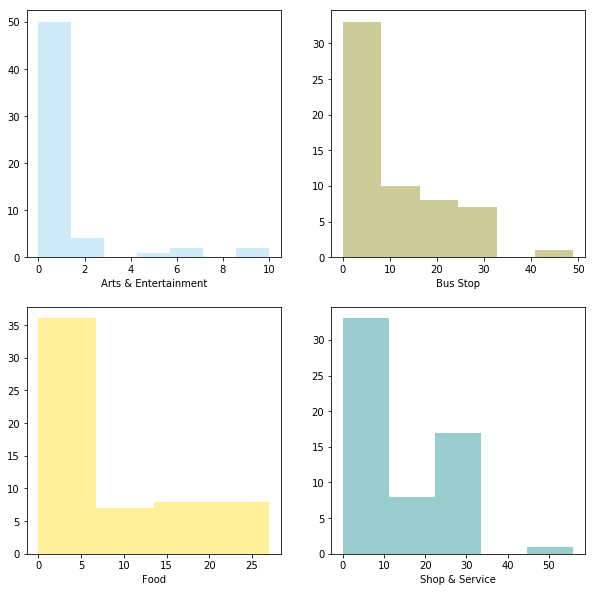

In [97]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df_venues_count['Arts & Entertainment'] , color="skyblue", ax=axes[0, 0], kde=False)
sns.distplot(df_venues_count['Bus Stop'] , color="olive", ax=axes[0, 1], kde=False)
sns.distplot(df_venues_count['Food'] , color="gold", ax=axes[1, 0], kde=False)
sns.distplot(df_venues_count['Shop & Service'] , color="teal", ax=axes[1, 1], kde=False)

In [98]:
df_venues_count.corr()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Category,,,,,
Arts & Entertainment,1.000000,0.554105,0.522825,0.222226,0.530297
Bus Stop,0.554105,1.000000,0.895471,0.491212,0.916237
Food,0.522825,0.895471,1.000000,0.561045,0.880617
Metro Station,0.222226,0.491212,0.561045,1.000000,0.490118
Shop & Service,0.530297,0.916237,0.880617,0.490118,1.000000


In [99]:
from scipy import stats

In [100]:
p_value_data = []
for left in df_venues_count.columns:
    p_values = [left]
    for right in df_venues_count.columns:        
        pearson_coef, p_value = stats.pearsonr(df_venues_count[left], df_venues_count[right])
        if(p_value < 0.001):
            p_values.append('strong')
        elif(p_value < 0.05):
            p_values.append('moderate')
        elif(p_value < 0.1):
            p_values.append('weak')
        else:
            p_values.append('no')            
    p_value_data.append(p_values)

In [101]:
df_p_values = pd.DataFrame(p_value_data, columns=['Category'] + df_venues_count.columns.tolist())

In [102]:
df_p_values

,Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
0,Arts & Entertainment,strong,strong,strong,weak,strong
1,Bus Stop,strong,strong,strong,strong,strong
2,Food,strong,strong,strong,strong,strong
3,Metro Station,weak,strong,strong,strong,strong
4,Shop & Service,strong,strong,strong,strong,strong


In [106]:
import folium

In [116]:
hk_coords = (22.28552, 114.15769)

In [117]:
hk_map = folium.Map(location=hk_coords, zoom_start=12, tiles='Stamen Toner')

cinemas_fg = folium.FeatureGroup()
targets_fg = folium.FeatureGroup()

for(location, address, latitude, longitude) in df_p_locations.itertuples(index=False):
    targets_fg.add_child(
        folium.CircleMarker(
            location=(latitude, longitude),
            popup=location,
            radius=5,
            fill=True,
            color='yellow',
            fill_opacity=1.
        )
    )

boss_ratings = df_Jack_list.set_index('Name')    
name_list = boss_ratings.index.tolist()

for (name, address, latitude, longitude ) in df_cinemas.itertuples(index=False):    
    
    color = 'blue'        
    popup = name
    
    if( name in name_list ):
        color = 'red'    
        popup = '{} - Rating: {}'.format(name, boss_ratings.loc[name,'Rating'])
        
    cinemas_fg.add_child(        
        folium.CircleMarker(
            location=(latitude, longitude),
            popup=popup,
            radius=5,
            fill=True,
            color=color,
            fill_opacity=1.
        )
    )
    
hk_map.add_child(cinemas_fg)
hk_map.add_child(targets_fg)

In [118]:
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,6.0,11.0,6.0,0.0,18.0
Broadway Cinematheque,2.0,23.0,13.0,0.0,24.0
Broadway Circuit - CYBERPORT,0.0,1.0,0.0,0.0,2.0
Broadway Circuit - HOLLYWOOD,0.0,5.0,0.0,0.0,4.0
Broadway Circuit - KINGSWOOD GINZA,0.0,2.0,0.0,0.0,1.0


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [121]:
venues_normalized = scaler.fit_transform(df_venues_count)

In [122]:
df_venues_normalized = pd.DataFrame(
    venues_normalized,
    index=df_venues_count.index,
    columns=df_venues_count.columns
)

In [123]:
df_venues_normalized.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Cinema Name,,,,,
AMC Pacific Place,0.6,0.224490,0.222222,0.0,0.321429
Broadway Cinematheque,0.2,0.469388,0.481481,0.0,0.428571
Broadway Circuit - CYBERPORT,0.0,0.020408,0.000000,0.0,0.035714
Broadway Circuit - HOLLYWOOD,0.0,0.102041,0.000000,0.0,0.071429
Broadway Circuit - KINGSWOOD GINZA,0.0,0.040816,0.000000,0.0,0.017857


In [170]:
boss_rating_table = pd.merge(
    df_Jack_list,
    df_venues_normalized,
    how='left',
    left_on='Name',
    right_index=True
)
boss_rating_table.drop(['Name','Rating'], axis=1, inplace=True)
boss_rating_table

,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,0.1,0.326531,0.555556,0.5,0.500000
3,0.0,0.040816,0.000000,0.0,0.107143
4,0.6,0.224490,0.222222,0.0,0.321429
5,0.0,0.061224,0.037037,0.0,0.196429


In [171]:
boss_rating_table.fillna(0, inplace=True)

In [172]:
boss_rating_table

,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000
2,0.1,0.326531,0.555556,0.5,0.500000
3,0.0,0.040816,0.000000,0.0,0.107143
4,0.6,0.224490,0.222222,0.0,0.321429
5,0.0,0.061224,0.037037,0.0,0.196429


In [173]:
boss_profile = boss_rating_table.transpose().dot(df_Jack_list['Rating'])

In [174]:
df_targets_normalized = pd.DataFrame(
    scaler.transform(df_target_venues_count),
    index=df_target_venues_count.index,
    columns=df_target_venues_count.columns
)

In [175]:
df_targets_normalized

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Location,,,,,
L1,0.0,0.020408,0.000000,0.0,0.053571
L2,0.0,0.081633,0.074074,0.0,0.017857
L3,0.0,0.183673,0.185185,0.5,0.160714
L4,0.1,0.183673,0.074074,0.5,0.107143
L5,0.0,0.265306,0.148148,1.0,0.214286


## Results Section

where you discuss the results.

In [176]:
df_recommend = (df_targets_normalized*boss_profile).sum(axis=1)/boss_profile.sum()

In [191]:
df_recommend = df_recommend.reset_index(name='Rating')

In [177]:
df_p_locations

,Location,Address,Latitude,Longitude
0,L1,"Sau Mau Ping Shopping Centre, Sau Mau Ping",22.319503,114.232187
1,L2,"Tuen Mun Ferry, Tuen Mun",22.371780,113.966039
2,L3,"Un Chau Shopping Centre, Cheung Sha Wan",22.337280,114.156457
3,L4,"Prosperity Millennia Plaza, North Point",22.291698,114.208168
4,L5,"Tsuen Fung Centre Shopping Arcade, Tsuen Wan",22.372112,114.119317


In [192]:
df_recommend

,Location,Rating
0,L1,0.018548
1,L2,0.036297
2,L3,0.205129
3,L4,0.178376
4,L5,0.310657


In [193]:
df_final = pd.merge(
    df_p_locations,
    df_recommend,
    left_on='Location',
    right_on='Location'
)

In [196]:
df_final.sort_values('Rating', ascending=False, inplace=True)
df_final

,Location,Address,Latitude,Longitude,Rating
4,L5,"Tsuen Fung Centre Shopping Arcade, Tsuen Wan",22.372112,114.119317,0.310657
2,L3,"Un Chau Shopping Centre, Cheung Sha Wan",22.337280,114.156457,0.205129
3,L4,"Prosperity Millennia Plaza, North Point",22.291698,114.208168,0.178376
1,L2,"Tuen Mun Ferry, Tuen Mun",22.371780,113.966039,0.036297
0,L1,"Sau Mau Ping Shopping Centre, Sau Mau Ping",22.319503,114.232187,0.018548


In [199]:
print('Therefore, the location "{}" of address "{}" is the final target for Jack'.format(df_final.iat[0,0], df_final.iat[0,1]))

Therefore, the location "L5" of address "Tsuen Fung Centre Shopping Arcade, Tsuen Wan" is the final target for Jack


In [200]:
df_target_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Location,,,,,
L1,0.0,1.0,0.0,0.0,3.0
L2,0.0,4.0,2.0,0.0,1.0
L3,0.0,9.0,5.0,1.0,9.0
L4,1.0,9.0,2.0,1.0,6.0
L5,0.0,13.0,4.0,2.0,12.0


In [201]:
boss_profile.sort_values(ascending=False)

Shop & Service          3.548214
Food                    2.955556
Bus Stop                2.151020
Metro Station           2.150000
Arts & Entertainment    1.810000
dtype: float64

## Discussion Section

where you discuss any observations you noted and any recommendations you can make based on the results.

In [202]:
df_venues_count.mean().to_frame(name='Average Count')

,Average Count
Category,
Arts & Entertainment,0.847458
Bus Stop,11.033898
Food,7.881356
Metro Station,0.271186
Shop & Service,13.847458


In [203]:
df_target_venues_count.mean().to_frame('Average Count')

,Average Count
Category,
Arts & Entertainment,0.2
Bus Stop,7.2
Food,2.6
Metro Station,0.8
Shop & Service,6.2


Number of venues for 5 target locations are below the average.

Actually, more potential locations could be found through different channels like local property agents. And the HK data from FourSquare maybe out-dated, the report should acquire more data from other geo data sources such as Google Place API.



## Conclusion Section

where you conclude the report.

Jack could make the decision now. He aims to find the best place to set up a new cinema in Hong Kong, and the factors of "best location" is based on surroundings like the number of venues in eating, shopping and transportations. The boss also provides his favorite list of cinema to limit what the "best location" is further. Content-based filtering machine learning is the most suitable method to get the answer. It compare Jack's preferences and cinema profile to show the recommendation results.

As the weighting matrix is developed, The module to select target locations could be improved and new cinema can be quickly picked out as the recommendation in the future.